In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

# 2D lattice connections

In [15]:
l = 20

xs = numpy.arange(0,l)
ys = numpy.arange(0,l)
connections = []

for x in xs:
    for y in ys:
        aindex = y*l + x
        if x < l-1:
            bindex = y*l + (x+1)
            connections.append((aindex,bindex))
        if y < l-1:
            bindex = (y+1)*l + x
            connections.append((aindex,bindex))
print(len(connections))

760


# Check timings + precompute size

First for single threaded then multithreaded

In [17]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=False, num_experiments=16, layer=connections)
size = g.get_precompute_size()
no_pre_time = %timeit -o g.apply_layer()

g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=False, num_experiments=16, layer=connections)
g.precompute_connections()
pre_time = %timeit -o g.apply_layer()

print(size)

635 ms ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
301 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8576016


In [18]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
no_pre_time = %timeit -o g.apply_layer()

g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
g.precompute_connections()
pre_time = %timeit -o g.apply_layer()

169 ms ± 4.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
147 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Run simulation

In [28]:
g = py_entropy.GenericMultiDefectState(l, 1, [1,1], parallel_matrix_mul=True, num_experiments=16)
oned_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
oned_states = g.get_states().shape[0]

In [31]:
g = py_entropy.GenericMultiDefectState(2*l, 1, [1,1], parallel_matrix_mul=True, num_experiments=16)
oned_perimeter_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
oned_perimeter_states = g.get_states().shape[0]

In [20]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
twod_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
twod_states = g.get_states().shape[0]

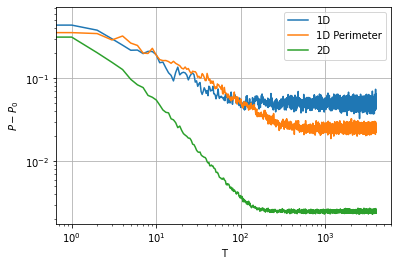

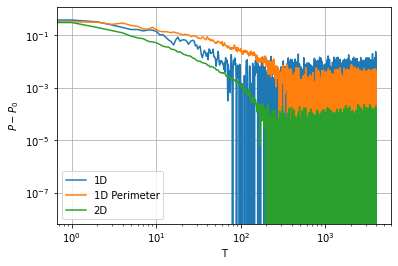

In [35]:
pyplot.plot(oned_purities, label='1D')
pyplot.plot(oned_perimeter_purities, label='1D Perimeter')
pyplot.plot(twod_purities, label='2D')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P - P_0$')
pyplot.legend()
pyplot.grid()
pyplot.show()

pyplot.plot(oned_purities - 1.0/oned_states, label='1D')
pyplot.plot(oned_perimeter_purities - 1.0/oned_perimeter_states, label='1D Perimeter')
pyplot.plot(twod_purities - 1.0/twod_states, label='2D')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P - P_0$')
pyplot.legend()
pyplot.grid()
pyplot.show()